In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import shutil
import ntpath
import re
import csv
import json
import requests
import pytz
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import KBinsDiscretizer
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, LSTM, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime as dt
from datetime import timedelta



In [5]:
df = pd.read_csv("E:/DL Project/archive (3)/1-09-1-20.csv",index_col='Unnamed: 0',parse_dates=True)
df.columns = np.arange(42)
df

C:\Users\ONGC\AppData\Local\Temp\ipykernel_27380\36109664.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("E:/DL Project/archive (3)/1-09-1-20.csv",index_col='Unnamed: 0',parse_dates=True)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1673302660926,2023-01-09 22:17:40,17181.6,23.371,17181.5,0.746,17181.4,5.428,17181.2,0.890,...,17182.2,5.168,17182.3,0.020,17182.4,6.692,17182.5,1.904,17182.6,2.546
1,1673302661177,2023-01-09 22:17:41,17181.6,24.232,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.001,17182.5,1.869,17182.6,2.105
2,1673302661427,2023-01-09 22:17:41,17181.6,24.403,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.012,17182.5,1.869,17182.6,2.713
3,1673302661678,2023-01-09 22:17:41,17181.6,24.874,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.001,17182.5,2.570,17182.6,2.613
4,1673302661928,2023-01-09 22:17:41,17181.6,24.403,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.001,17182.5,2.589,17182.6,2.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730865,1674238247671,2023-01-20 18:10:47,21337.6,0.167,21337.5,0.100,21337.4,0.014,21336.9,0.025,...,21338.2,0.022,21338.3,0.028,21338.4,0.235,21338.5,1.657,21338.6,0.234
3730866,1674238247921,2023-01-20 18:10:47,21337.5,0.108,21337.4,0.014,21336.9,0.257,21336.8,0.063,...,21338.2,0.022,21338.3,0.036,21338.4,0.236,21338.5,1.657,21338.6,0.235
3730867,1674238248172,2023-01-20 18:10:48,21337.4,0.891,21337.2,0.552,21337.1,1.095,21336.9,0.025,...,21338.1,0.002,21338.2,0.048,21338.3,0.036,21338.4,0.001,21338.5,1.658
3730868,1674238248422,2023-01-20 18:10:48,21337.4,2.456,21337.3,1.149,21337.2,0.002,21336.9,0.025,...,21338.1,0.002,21338.2,0.048,21338.3,0.036,21338.4,0.001,21338.5,1.658


In [6]:
df = df.drop_duplicates(subset=1)
# df.loc[:,0] = df[0].apply(lambda x:dt.fromtimestamp(x/1000,tz=pytz.UTC))
data = df.loc[:,[2,3,22,23,4,5,24,25,6,7,26,27,8,9,28,29,10,11,30,31,12,13,32,33,14,15,34,35,16,17,36,37,18,19,38,39,20,21,40,41]]
# data.set_index(keys=pd.to_datetime(df[0]),drop=True,inplace=True)
data.set_index(keys=pd.to_datetime(df[1]),drop=True,inplace=True)

In [7]:
data

,2,3,22,23,4,5,24,25,6,7,...,36,37,18,19,38,39,20,21,40,41
1,,,,,,,,,,,,,,,,,,,,,
2023-01-09 22:17:40,17181.6,23.371,17181.7,7.474,17181.5,0.746,17181.8,3.442,17181.4,5.428,...,17182.4,6.692,17180.7,0.876,17182.5,1.904,17180.6,2.854,17182.6,2.546
2023-01-09 22:17:41,17181.6,24.232,17181.7,7.088,17181.5,0.694,17181.8,2.554,17181.4,5.428,...,17182.4,6.001,17180.7,0.876,17182.5,1.869,17180.6,2.854,17182.6,2.105
2023-01-09 22:17:42,17181.6,24.403,17181.7,7.272,17181.5,0.686,17181.8,2.480,17181.4,5.428,...,17182.4,6.001,17180.7,0.876,17182.5,3.785,17180.6,2.854,17182.6,1.404
2023-01-09 22:17:43,17181.6,24.376,17181.7,5.548,17181.5,0.689,17181.8,2.480,17181.4,5.429,...,17182.4,6.001,17180.7,0.876,17182.5,2.572,17180.6,2.854,17182.6,1.442
2023-01-09 22:17:44,17181.6,24.376,17181.7,5.426,17181.5,0.715,17181.8,2.480,17181.4,5.429,...,17182.4,6.692,17180.7,0.876,17182.5,1.876,17180.6,2.854,17182.6,1.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20 18:10:44,21335.9,45.952,21336.0,1.655,21335.8,0.699,21336.2,0.898,21335.7,9.002,...,21337.1,1.128,21335.0,0.165,21337.2,1.007,21334.9,0.763,21337.3,0.868
2023-01-20 18:10:45,21335.9,27.256,21336.0,14.002,21335.8,0.699,21336.1,0.558,21335.7,1.404,...,21336.8,0.014,21334.9,0.205,21337.1,0.001,21334.8,0.284,21337.2,0.413
2023-01-20 18:10:46,21335.9,16.003,21336.0,2.114,21335.8,1.842,21336.1,0.009,21335.7,0.247,...,21336.9,1.139,21334.9,0.096,21337.0,0.065,21334.8,0.298,21337.1,0.234


In [8]:
#CALCULATE MIDPRICE
midprice = pd.DataFrame((df.iloc[:,2] + df.iloc[:,22] )/2,columns=['Price'] )
midprice['Time'] = pd.to_datetime(df[1])
midprice.set_index(keys='Time',inplace=True)

In [9]:
midprice

,Price
Time,
2023-01-09 22:17:40,17181.65
2023-01-09 22:17:41,17181.65
2023-01-09 22:17:42,17181.65
2023-01-09 22:17:43,17181.65
2023-01-09 22:17:44,17181.65
...,...
2023-01-20 18:10:44,21335.95
2023-01-20 18:10:45,21335.95
2023-01-20 18:10:46,21335.95


In [10]:
#CALCULATE LABELS BASED ON THE DEEPLOB PAPER METHOD
def labeling(data,k,alpha,type=1):
  data["MeanNegativeMid"] = data['Price'].rolling(window=k).mean()
  data["MeanPositiveMid"] = data["MeanNegativeMid"].shift(-(k-1))
  if type == 1:
      data["SmoothingLabel"] = (data["MeanPositiveMid"] - data['Price']) / data['Price']
  elif type == 2:
      data["SmoothingLabel"] = (data["MeanPositiveMid"] - data["MeanNegativeMid"]) / data["MeanNegativeMid"]
  labels_np = data["SmoothingLabel"].dropna()
  data[k] = None
  data.loc[labels_np.index, k] = 0
  data.loc[data["SmoothingLabel"] < -alpha, k] = -1
  data.loc[data["SmoothingLabel"] > alpha, k] = 1
  return data

In [11]:
label = labeling(midprice,k=10,alpha=0.00001)
#REMOVE THE NULL ROWS
label.dropna(inplace=True)
data= data.loc[label.index]

In [12]:
#SLIDING WINDOW NORMALIZATION
window_size=86400
col_mean = data.rolling(window_size).mean()
col_std = data.rolling(window_size).std()

data = (data - col_mean)/col_std
data.dropna(inplace=True)

In [13]:
#ONE HOT ENCODING THE LABELS
label = label.loc[data.index,10]
label = tf.keras.utils.to_categorical(label,num_classes=3)

In [14]:
#CREATE DATALODER
class DataSegmentation(tf.keras.utils.Sequence):
    def __init__(self, X, Y,number_features,window_size,batch_size):
        self.X, self.Y = X.reset_index(drop=True), Y
        self.window_size = window_size
        self.batch_size = batch_size
        self.number_features = number_features

    def __len__(self):
        return math.floor((len(self.X)-self.window_size)/ self.batch_size)
    def __getitem__(self, idx):
      dataX =[]
      dataY=[]
      idx+=self.window_size
      for i in range(self.batch_size):
        x_sample=self.X.loc[idx-self.window_size:idx-1]
        y_sample=self.Y[idx]
        dataX.append(x_sample)
        dataY.append(y_sample)
        idx+=1
      dataX = np.array(dataX).reshape(-1,self.window_size,self.number_features)
      dataY = np.array(dataY)
      return dataX,dataY

In [15]:
#SPLITING THE DATA INTO TRAIN, VALIDATION AND TEST
batch_size= 20
window_size= 300
number_features = 40
Train_size = math.floor(len(data)*0.6)
Validation_size = math.floor(len(data)*0.15)
TrainBatch = DataSegmentation(data.iloc[:Train_size],label[:Train_size],number_features,window_size,batch_size)
ValidationBatch = DataSegmentation(data.iloc[Train_size:Train_size+Validation_size],label[Train_size:Train_size+Validation_size],number_features,window_size,batch_size)
TestBatch = DataSegmentation(data.iloc[Train_size+Validation_size:],label[Train_size+Validation_size:],number_features,window_size,batch_size)

In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

# %%
import os
import logging
import glob
import argparse
import sys
import time
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set random seeds
np.random.seed(1)
tf.random.set_seed(2)

In [17]:
#DEEP LOB ORIGINAL MODEL
def create_deeplob(T, NF, number_of_lstm):
    input_lmd = Input(shape=(T, NF, 1))
    # build the convolutional block
    conv_first1 = Conv2D(32, (1, 2), strides=(1, 2))(input_lmd)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (1, 2), strides=(1, 2))(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (1, 10))(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    # build the inception module
    convsecond_1 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)
    convsecond_1 = Conv2D(64, (3, 1), padding='same')(convsecond_1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)
    convsecond_2 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)
    convsecond_2 = Conv2D(64, (5, 1), padding='same')(convsecond_2)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)
    convsecond_3 = MaxPooling2D((3, 1), strides=(1, 1), padding='same')(conv_first1)
    convsecond_3 = Conv2D(64, (1, 1), padding='same')(convsecond_3)
    convsecond_3 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_3)
    convsecond_output = keras.layers.concatenate([convsecond_1, convsecond_2, convsecond_3], axis=3)
    conv_reshape = Reshape((int(convsecond_output.shape[1]), int(convsecond_output.shape[3])))(convsecond_output)
    conv_reshape = keras.layers.Dropout(0.2, noise_shape=(None, 1, int(conv_reshape.shape[2])))(conv_reshape, training=True)
    # build the last LSTM layer
    conv_lstm = LSTM(number_of_lstm)(conv_reshape)
    # build the output layer
    out = Dense(3, activation='softmax')(conv_lstm)
    model = Model(inputs=input_lmd, outputs=out)
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model = create_deeplob(300,40,64)

e:\DL Project\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
import os
import tensorflow as tf


checkpoint_dir = os.path.join(os.getcwd(), "checkpoints", "deeplob")
os.makedirs(checkpoint_dir, exist_ok=True)


best_model_path = os.path.join(checkpoint_dir, "best_model.keras")


log_dir = os.path.join(os.getcwd(), "logs", "deeplob")
os.makedirs(log_dir, exist_ok=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model = create_deeplob(300, 40, 64)
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


ckpt_full = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_model_path,
    save_weights_only=False,      
    monitor="val_loss",
    mode="min",
    save_best_only=True,          
    verbose=1
)

# Backup: always keep a per-epoch checkpoint 
epoch_ckpt_path = os.path.join(checkpoint_dir, "epoch_{epoch:02d}-val_{val_loss:.4f}.keras")
ckpt_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath=epoch_ckpt_path,
    save_weights_only=False,
    monitor="val_loss",
    mode="min",
    save_best_only=False,         # save every epoch
    verbose=0
)

# Early stopping (recommended)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1
)


history = model.fit(
    TrainBatch,
    validation_data=ValidationBatch,
    epochs=10,
    verbose=1,
    callbacks=[ckpt_full, ckpt_epoch, early_stop, tensorboard_cb]
)


e:\DL Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6351 - loss: 0.8310
Epoch 1: val_loss improved from None to 1.31503, saving model to e:\DL Project\checkpoints\deeplob\best_model.keras
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 6422s 252ms/step - accuracy: 0.6516 - loss: 0.7833 - val_accuracy: 0.3249 - val_loss: 1.3150
Epoch 2/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7126 - loss: 0.6578
Epoch 2: val_loss did not improve from 1.31503
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 4680s 184ms/step - accuracy: 0.7374 - loss: 0.6048 - val_accuracy: 0.3659 - val_loss: 1.6526
Epoch 3/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8182 - loss: 0.4370
Epoch 3: val_loss did not improve from 1.31503
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 5542s 218ms/step - accuracy: 0.8373 - loss: 0.3973 - val_accuracy: 0.3882 - val_loss: 2.0481
Epoch 4/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8876 - loss: 0.2874
Epoch 4: val_loss did not improve from 1.315

In [ ]:
To resume training from where it stopped, uncomment the following code
# import tensorflow as tf
# import glob, os

# # Path where checkpoints are saved
# checkpoint_dir = os.path.join(os.getcwd(), "checkpoints", "deeplob")

# # Find the best model or the latest one
# latest_model_path = max(glob.glob(os.path.join(checkpoint_dir, "*.keras")), key=os.path.getmtime)
# print("🔁 Resuming from:", latest_model_path)

# # Load full model (includes optimizer state)
# model = tf.keras.models.load_model(latest_model_path)

# # Continue training from where it stopped
# history2 = model.fit(
#     TrainBatch,
#     validation_data=ValidationBatch,
#     epochs=20,           # extend if needed
#     verbose=1,
#     callbacks=[ckpt_full, early_stop]
# )


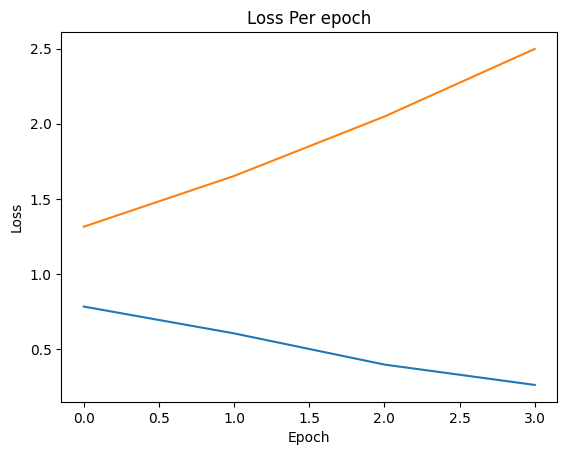

In [20]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

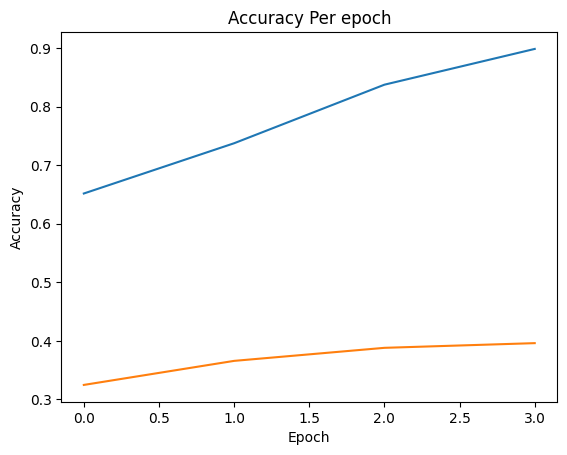

In [21]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [22]:

loss, acc = model.evaluate(TestBatch, steps=100)
print(f"✅ Evaluation - Loss: {loss:.4f}, Accuracy: {acc:.4f}")

pred = model.predict(TestBatch)
print("✅ Prediction shape:", pred.shape)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5615 - loss: 1.1221
✅ Evaluation - Loss: 1.1221, Accuracy: 0.5615
10594/10594 ━━━━━━━━━━━━━━━━━━━━ 413s 39ms/step
✅ Prediction shape: (211880, 3)


In [23]:
loss = model.evaluate(TestBatch,steps=100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5615 - loss: 1.1221


In [24]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,f1_score,precision_score,classification_report
import seaborn as sn
def plot_results(y_true,y_pred):
    conf_matrix=confusion_matrix(y_true,y_pred)
    # conf_matrix = conf_matrix / conf_matrix.astype('float').sum(axis=0)
    plt.figure(figsize=(10,8))
    sn.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cmap='RdYlGn',fmt='g') # font size
    plt.title("Confusion Matrix")
    plt.show()
    print(classification_report(y_true, y_pred, digits=4))

In [25]:
y_test = []
for i in range(len(TestBatch)):
  y_test.append(TestBatch[i][1])
y_test = np.array(y_test).reshape(-1,3)
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)

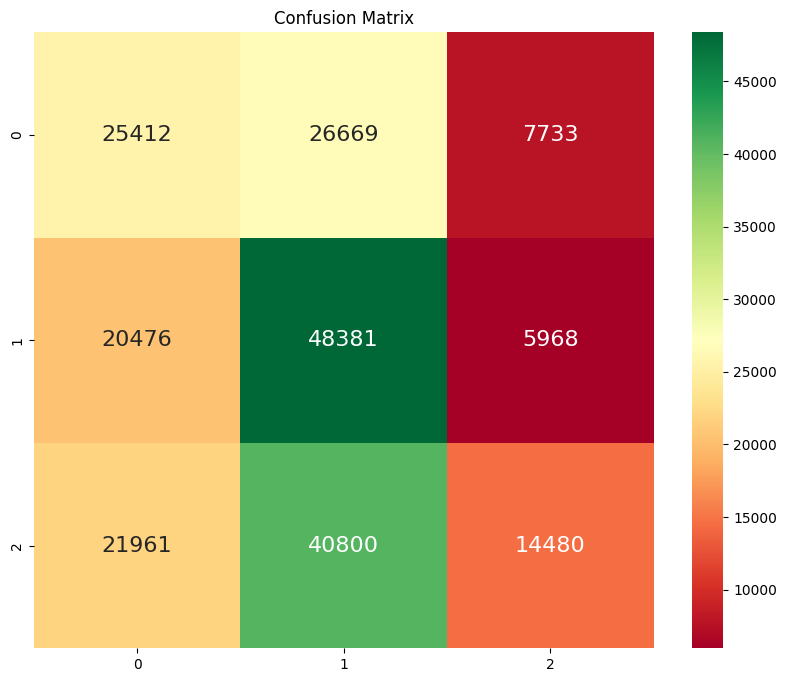

              precision    recall  f1-score   support

           0     0.3745    0.4249    0.3981     59814
           1     0.4176    0.6466    0.5075     74825
           2     0.5138    0.1875    0.2747     77241

    accuracy                         0.4166    211880
   macro avg     0.4353    0.4196    0.3934    211880
weighted avg     0.4405    0.4166    0.3917    211880



In [26]:
plot_results(y_test,y_pred)

In [2]:
from tcn import TCN, tcn_full_summary

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tcn import TCN


checkpoint_dir = os.path.join(os.getcwd(), "checkpoints", "tcn")
os.makedirs(checkpoint_dir, exist_ok=True)

best_model_path = os.path.join(checkpoint_dir, "best_model.keras")
epoch_model_path = os.path.join(checkpoint_dir, "epoch_{epoch:02d}-val_{val_loss:.4f}.keras")


model = tf.keras.models.Sequential([
    TCN(input_shape=(300, 40), nb_filters=256, dilations=[1, 2, 4, 8, 16, 32]),
    Dense(3, activation='softmax')
])

adam = Adam(learning_rate=1e-5)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


ckpt_best = ModelCheckpoint(
    filepath=best_model_path,
    save_weights_only=False,      # ⚡ Save full model, not just weights
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)


ckpt_epoch = ModelCheckpoint(
    filepath=epoch_model_path,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=False,         # saves every epoch
    verbose=0
)


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)


log_dir = os.path.join(os.getcwd(), "logs", "tcn")
os.makedirs(log_dir, exist_ok=True)
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(
    TrainBatch,
    validation_data=ValidationBatch,
    epochs=10,
    verbose=1,
    callbacks=[ckpt_best, ckpt_epoch, early_stop, tensorboard_cb]
)


Epoch 1/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.6088 - loss: 1.5510
Epoch 1: val_loss improved from None to 2.55282, saving model to e:\DL Project\checkpoints\tcn\best_model.keras
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 8698s 342ms/step - accuracy: 0.7106 - loss: 0.8955 - val_accuracy: 0.3456 - val_loss: 2.5528
Epoch 2/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.9236 - loss: 0.2243
Epoch 2: val_loss did not improve from 2.55282
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 14125s 555ms/step - accuracy: 0.9527 - loss: 0.1546 - val_accuracy: 0.3606 - val_loss: 2.8508
Epoch 3/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9928 - loss: 0.0391
Epoch 3: val_loss did not improve from 2.55282
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 7337s 288ms/step - accuracy: 0.9940 - loss: 0.0321 - val_accuracy: 0.3419 - val_loss: 3.7788
Epoch 4/10
25448/25448 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9940 - loss: 0.0254
Epoch 4: val_loss did not improve from 2.55282


In [ ]:
To resume training from where it stopped, uncomment the following code
# import tensorflow as tf
# import glob, os

# checkpoint_dir = os.path.join(os.getcwd(), "checkpoints", "tcn")
# latest_model = max(glob.glob(os.path.join(checkpoint_dir, "*.keras")), key=os.path.getmtime)

# print("🔁 Resuming from:", latest_model)
# model = tf.keras.models.load_model(latest_model)

# # Continue training
# history2 = model.fit(
#     TrainBatch,
#     validation_data=ValidationBatch,
#     epochs=20,
#     verbose=1,
#     callbacks=[ckpt_best, early_stop]
# )


In [4]:
from tensorflow.keras.models import load_model
import os

# Path to your saved model (adjust if needed)
model_path = r"E:\DL Project\checkpoints\tcn\best_model.keras"

# Reload the model (full architecture + weights)
model = load_model(model_path)

print("✅ Model loaded successfully from:", model_path)
model.summary()



✅ Model loaded successfully from: E:\DL Project\checkpoints\tcn\best_model.keras


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn_1 (TCN)                     │ (None, 256)            │     2,206,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,623,243 (25.27 MB)

 Trainable params: 2,207,747 (8.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,415,496 (16.84 MB)

In [7]:
pred = model.predict(TestBatch, verbose=1)
print("✅ Predictions shape:", pred.shape)


e:\DL Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10594/10594 ━━━━━━━━━━━━━━━━━━━━ 1030s 97ms/step
✅ Predictions shape: (211880, 3)


In [10]:
y_test = []
for i in range(len(TestBatch)):
  y_test.append(TestBatch[i][1])
y_test = np.array(y_test).reshape(-1,3)
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)